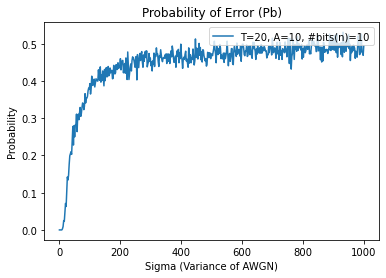

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Amplitude of s1(t) and s2(t)
A = 10
a1 = A
a2 = -A

# no. of bits
n = 10


when_1 = [A] * 10
when_0 = [-1 * A] * 10


def plot_signals(t, sig, noise, sig2):
    plt.subplot(221)
    plt.plot(t, sig, 'g-')
    plt.ylabel('Amplitude')
    plt.title('Transmitted NRZ-L Waveform (x(n))')

    plt.subplot(222)
    plt.plot(t, noise, 'r-')
    plt.ylabel('Amplitude')
    plt.title('AWGN')

    plt.subplot(223)
    plt.xlabel('Time(in seconds)')
    plt.ylabel('Amplitude')
    plt.title('Received Waveform (r(n))')
    plt.plot(t, sig + noise, 'y-')

    plt.subplot(224)
    plt.xlabel('Time(in seconds)')
    plt.ylabel('Amplitude')
    plt.title('Filtered NRZ-L Waveform with Match Filter')
    plt.plot(t, sig2, 'b-')
    plt.show()


def convolution(r_n, h):
    return sum(np.convolve(r_n, h))


def generate_signal(bitSeq):
    sig = []
    for i in bitSeq:
        if i == 1:
            sig.extend(when_1)
        else:
            sig.extend(when_0)
    return sig


def myAwgn(sigma):
    return sigma*np.random.randn(n*10)


def match_filter(r_n):
    threshold = (a1 + a2) / 2
    h = []  # h(t)=s1(t)-s2(t) 0<=t<=T
    j = 0.0
    while j < T:
        h.append(2*A)
        j += T / 10
    # print(h)
    detected_msg = []
    for i in range(n):
        # print(r_n[i*10:(i+1)*10])
        z = convolution(r_n[i*10:(i+1)*10], h)
        if z > threshold:
            detected_msg.append(1)
        else:
            detected_msg.append(0)
    return detected_msg


def main(T, sigma):
    Ts = T / 10
    TxBitSeq = [np.random.randint(0, 2, dtype=int) for i in range(n)]
    # print('Transmitted Bit Sequence: ', TxBitSeq)
    sig = generate_signal(TxBitSeq)
    t = np.arange(0, n * T, Ts)
    # t = np.linspace(0, n*int(T), n*int(T))
    noise = myAwgn(sigma)
    received_sig = sig + noise
    RxBitSeq = match_filter(received_sig)
    # print('Received Bit Sequence:    ', RxBitSeq)
    sig2 = generate_signal(RxBitSeq)
    # plot_signals(t, sig, noise, sig2)

    numerator = sum([abs(TxBitSeq[i] - RxBitSeq[i]) for i in range(n)])
    return numerator


# no. of experiment
n_exp = 100

if __name__ == "__main__":

    T = int(input('Enter the width of the pulse(in seconds): '))
    # main(T,2)
    # variance of AWGN
    sigma = np.arange(1, 1001, 2)
    x = sigma
    y = []
    for i in range(len(sigma)):
        Pb = 0
        for _ in range(n_exp):
            Pb += main(T, sigma[i]) / n
        Pb = Pb / n_exp
        y.append(Pb)
    plt.plot(x, y, label='T={t}, A={a}, #bits(n)={n}'.format(t=T, a=A, n=n))
    plt.xlabel('Sigma (Variance of AWGN)')
    plt.ylabel('Probability')
    plt.title("Probability of Error (Pb)")
    plt.legend(loc='upper right',)
    plt.show()
